## **Markov Decision Porcess**

An **MDP (Markov Decision Process)** provides a formal framework to model decision-making where outcomes are partly random and partly under the control of the decision-maker (agent). MDPs are used to model environments in reinforcement learning, where an agent interacts with the environment to maximize cumulative rewards.

An MDP consists of five key components, often summarized as the "tuple" $(S, A, P, R, \gamma)$:

#### States (S)

The set of all possible states $S$ that the agent can be in. A state gives a complete description of the current situation the agent finds itself in. For example, in a grid world, each square on the grid is a state.

#### Actions (A)

The set of all possible actions $A$ that the agent can take. In each state, the agent can choose from a set of actions to interact with the environment. For example, in a grid world, actions might include moving up, down, left, or right.

#### Transition Probability (P)

The transition probability function $P(s' \mid s, a)$ defines the probability of moving from state $s$ to state $s'$ when the agent takes action $a$. This describes the dynamics of the environment, including any randomness in the outcome of the agent’s actions.

For example, in a grid world, if the agent moves up from a particular state, there’s a chance it may end up in the intended state or another neighboring state due to uncertainty or noise in the environment.

#### Reward Function (R)

The reward function $R(s, a, s')$ specifies the immediate reward the agent receives after transitioning from state $s$ to state $s'$ due to action $a$. This reward can be positive or negative, depending on whether the agent's action leads to a desirable outcome or not.

For example, in a grid world, the agent might receive a reward of $+10$ for reaching a goal state or a penalty of $-1$ for each move.

#### Discount Factor ($\gamma$)

The discount factor $\gamma \in [0,1]$ determines how much the agent values future rewards compared to immediate rewards. A discount factor close to $1$ means the agent is more patient and values future rewards almost as much as immediate ones, while a discount factor close to $0$ means the agent is more short-sighted, focusing on immediate rewards.

The cumulative reward, or **return**, is calculated as:

$$
G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots
$$

### Markov Property

A key characteristic of an MDP is the **Markov Property**, which means that the future state $s_{t+1}$ depends only on the current state $s_t$ and the action $a_t$ taken by the agent, and not on any previous states. In other words, the system is memoryless: the current state captures all relevant information about the past.

Formally:

$$
P(s_{t+1} \mid s_t, a_t, s_{t-1}, a_{t-1}, \dots, s_0, a_0) = P(s_{t+1} \mid s_t, a_t)
$$

#### Objective in MDP

The objective of an agent in an MDP is to find a policy $\pi$ (a strategy that tells the agent which action to take in each state) that maximizes the expected cumulative reward, often called the **return**.

$$
\pi^* = \arg\max_{\pi} \, \mathbb{E}\left[ \sum_{t=0}^\infty \gamma^t R(s_t, a_t) \right]
$$

Here, the goal is to maximize the total rewards over time, balancing immediate and future rewards through the discount factor $\gamma$.

#### Key Concepts

- **Value Function $V(s)$**: The expected return (cumulative future rewards) from being in state $s$ and following a policy $\pi$.

- **Action-Value Function $Q(s, a)$**: The expected return from being in state $s$, taking action $a$, and then following a policy $\pi$.

#### Example

Imagine a robot in a grid world. Each square is a state, and the robot can take actions like moving up, down, left, or right. Each time the robot moves, it gets a reward (e.g., $-1$ for each step, $+10$ for reaching a goal). The robot’s task is to learn the best policy (sequence of actions) to maximize its total reward while navigating through the grid.




### **Value Function**

The value function in reinforcement learning measures the long-term goodness of a state. It quantifies how much reward an agent can expect to collect starting from a particular state and following a specific policy. There are two main types of value functions:

#### State Value Function $V_{\pi}(s)$

This represents the expected return (cumulative future rewards) when starting from state $s$ and following a policy $\pi$.

$$
V_{\pi}(s) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) \mid s_0 = s \right]
$$

- $\pi$: The policy the agent is following (a rule mapping states to actions).
- $s_0$: The current state.
- $\gamma$: The discount factor that controls how much the agent values future rewards.
- $R(s_t, a_t)$: The reward at time $t$ after taking action $a_t$ from state $s_t$.

In simpler terms, $V_{\pi}(s)$ tells us the total expected reward an agent will receive starting from state $s$ if it keeps following policy $\pi$.

#### Action Value Function $Q_{\pi}(s, a)$

This represents the expected return starting from state $s$, taking action $a$, and then following policy $\pi$.

$$
Q_{\pi}(s, a) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t) \mid s_0 = s, \, a_0 = a \right]
$$

In other words, $Q_{\pi}(s, a)$ tells you how good it is to take action $a$ from state $s$, and then follow policy $\pi$. It’s useful because it evaluates not just states, but the value of state-action pairs.

### **Optimal Policy**

The optimal policy $\pi^*$ is the policy that maximizes the expected return for every state. In other words, if the agent follows $\pi^*$, it will always choose actions that maximize its total rewards over time.

The goal in reinforcement learning is to find this optimal policy. To do that, we define two important optimal functions:

#### Optimal State Value Function $V^*(s)$

The optimal state value function represents the maximum expected return the agent can get from state $s$, by following the best possible policy:

$$
V^*(s) = \max_{\pi} V_{\pi}(s)
$$

This is the best possible value the agent can achieve starting from state $s$.

#### Optimal Action Value Function $Q^*(s, a)$

Similarly, the optimal action value function represents the maximum expected return the agent can get by taking action $a$ from state $s$, and then following the optimal policy:

$$
Q^*(s, a) = \max_{\pi} Q_{\pi}(s, a)
$$

This is the best possible value the agent can achieve by taking action $a$ in state $s$ and acting optimally afterward.

### **Relationship Between Value Function and Optimal Policy**

Once the agent knows the optimal state value function $V^*(s)$, it can easily determine the optimal policy $\pi^*$ by always choosing actions that maximize the value of future states:

$$
\pi^*(s) = \arg\max_{a} Q^*(s, a)
$$

This means that in each state $s$, the agent picks the action $a$ that gives the highest action value $Q^*(s, a)$. Since $Q^*(s, a)$ tells us how good it is to take action $a$, the agent will always act in a way that maximizes its future rewards.

The **Bellman Optimality Equation** helps express the relationship between optimal values and optimal policies:

- **For the state value function $V^*(s)$**:

  $$
  V^*(s) = \max_{a} \mathbb{E} \left[ R(s, a) + \gamma V^*(s') \mid s, a \right]
  $$

  This equation says that the value of a state under the optimal policy is equal to the immediate reward from taking the best action $a$ plus the discounted value of the next state $s'$.

- **For the action value function $Q^*(s, a)$**:

  $$
  Q^*(s, a) = \mathbb{E} \left[ R(s, a) + \gamma \max_{a'} Q^*(s', a') \mid s, a \right]
  $$

  This says that the optimal value of a state-action pair is the immediate reward for taking action $a$ plus the value of acting optimally from the next state $s'$.

### **Finding the Optimal Policy**

There are various algorithms to find the optimal policy and value function:

- **Value Iteration**: Repeatedly updates the value function based on the Bellman Optimality Equation until the values converge.
- **Policy Iteration**: Alternates between policy evaluation (calculating $V_{\pi}(s)$) and policy improvement (making the policy greedier based on the updated values) until the policy converges to $\pi^*$.
- **Q-learning**: A model-free method where the agent learns $Q^*(s, a)$ directly through trial and error, without knowing the environment’s transition probabilities.

#### Example

Consider a grid world where the agent starts at the bottom-left corner and wants to reach a goal at the top-right. The optimal policy $\pi^*$ is the one that takes the agent through the shortest path, while maximizing future rewards (like reaching the goal sooner). The value function $V^*(s)$ for each state would tell the agent the expected reward for being in that state and following the optimal policy.


- The **value function** measures how good it is for the agent to be in a certain state or take a certain action, based on the expected cumulative rewards.
- The **optimal policy** is the strategy that maximizes the agent’s total reward, and it can be derived from the value function by choosing the best actions in every state.
- Algorithms like **value iteration** and **policy iteration** help compute these optimal value functions and policies.



### Example: Gridworld

Let's consider a gridworld environment where an agent can move up, down, left, or right in a grid. The agent starts at a particular location and aims to reach a goal, receiving rewards based on its actions.

#### Environment:

- **States ($S$)**: Represents the possible grid positions.
- **Actions ($A$)**: $A = \{ \text{up}, \text{down}, \text{left}, \text{right} \}$.
- **Transition Probabilities**: The agent moves deterministically in the direction of the chosen action, unless hitting a wall (staying in place).
- **Rewards**: The agent receives a reward of $+1$ for reaching the goal state, $-1$ for falling into a pit, and $0$ otherwise.

In [1]:
import numpy as np

# Define the environment
class GridworldMDP:
    def __init__(self, grid_size, start_state, goal_state, pit_state):
        self.grid_size = grid_size
        self.start_state = start_state
        self.goal_state = goal_state
        self.pit_state = pit_state
        self.actions = ['up', 'down', 'left', 'right']
        self.rewards = np.zeros(grid_size)  # Initialize rewards
        self.rewards[goal_state] = 1  # Reward for reaching the goal
        self.rewards[pit_state] = -1  # Penalty for falling into a pit

    def get_next_state(self, state, action):
        """Returns the next state given the current state and action."""
        row, col = state
        if action == 'up':
            next_state = (max(0, row - 1), col)
        elif action == 'down':
            next_state = (min(self.grid_size[0] - 1, row + 1), col)
        elif action == 'left':
            next_state = (row, max(0, col - 1))
        elif action == 'right':
            next_state = (row, min(self.grid_size[1] - 1, col + 1))
        return next_state

    def get_reward(self, state):
        """Returns the reward for a given state."""
        return self.rewards[state]

# Initialize the Gridworld MDP
grid_size = (4, 4)  # 4x4 grid
start_state = (0, 0)
goal_state = (3, 3)
pit_state = (1, 1)

env = GridworldMDP(grid_size, start_state, goal_state, pit_state)

# Example usage
state = (0, 0)
action = 'down'
next_state = env.get_next_state(state, action)
reward = env.get_reward(next_state)

print(f"Current state: {state}")
print(f"Action: {action}")
print(f"Next state: {next_state}")
print(f"Reward: {reward}")


Current state: (0, 0)
Action: down
Next state: (1, 0)
Reward: 0.0


***Question***: 

**How do you think the value function would change if the rewards were sparse (e.g., large reward only at the goal, and no rewards elsewhere)? Would it be harder or easier for the agent to find the optimal policy?**


- In a sparse reward environment, the value function takes longer to propagate, especially for states far from the goal.
- The optimal policy is harder to learn because the agent receives feedback infrequently.
- Effective exploration is key to discovering the optimal path, and techniques like reward shaping can help mitigate the difficulties.



#### 1. Impact of Sparse Rewards on the Value Function

In environments with sparse rewards, where the agent gets a significant reward only when it reaches a goal (e.g., **+100**), and the rest of the states have no reward (or small penalties), the value function for most states will initially be low or negative.

- **States closer to the goal** will have higher values because the agent can reach the goal in fewer steps, and the large reward propagates back through these states.
- **States further from the goal** will have low or even negative values (if there’s a penalty per step, like **-1**). This happens because the agent will need more steps to reach the goal, and the discount factor $\gamma$ makes future rewards less valuable.
- The sparse reward means the agent will struggle to initially differentiate between good and bad actions, as most actions don’t give immediate feedback. The value function will take longer to propagate and converge.

#### 2. Harder to Learn the Optimal Policy

Learning the optimal policy is harder when rewards are sparse because:

- The agent receives useful feedback (rewards) infrequently, so it has less information to base its decisions on.
- Without immediate rewards, the agent can struggle to know whether its actions are moving it toward the goal or away from it.
- For example, if the agent takes a series of correct steps but doesn't yet reach the goal, it might not realize those steps are part of the optimal path because there's no immediate reward to guide it. It only learns that it was on the right track once it finally reaches the goal and receives the large reward.

#### 3. Need for Exploration

In sparse reward environments, **exploration is critical**. Since immediate rewards don't provide much guidance, the agent must explore more thoroughly to discover the right sequence of actions that leads to the goal.

- Without proper exploration, the agent might never stumble upon the goal, or it might find a suboptimal path and stick to it.
- This is why methods like **epsilon-greedy** are important in such environments. Exploration ensures that the agent eventually reaches the rewarding goal state and can start learning the optimal policy from there.

#### 4. Value Propagation Takes Time

In reinforcement learning, the value function $V(s)$ propagates backward from the goal state. In sparse reward environments, this propagation can be slow because the agent receives the reward only after many steps. As the agent updates its value estimates, it takes time for the reward at the goal to influence states that are far away from the goal.

For example:

- States directly next to the goal will quickly learn that they lead to a large reward, so their value will increase early.
- States far from the goal will take longer to update their values because it takes more steps to propagate the reward back to them.

#### 5. Techniques to Handle Sparse Rewards

- **Reward Shaping**: One way to deal with sparse rewards is to introduce intermediate rewards that guide the agent. For example, giving a small positive reward for getting closer to the goal helps the agent understand that it’s moving in the right direction.

- **Exploration Strategies**: Advanced exploration strategies like **Boltzmann exploration** or **Upper Confidence Bound (UCB)** can help ensure the agent explores more efficiently, improving its chances of finding the goal.


## **Policy**

A **policy** $ \pi $ is essentially a strategy that the agent uses to decide which action to take in any given state. Formally, a policy $ \pi(a | s) $ defines a probability distribution over actions given a state $ s $. The policy tells the agent:

- In state $ s $, what action $ a $ should I take (or how likely I am to take it)?

#### **Why Multiple Policies?**

There are potentially **many policies** because an agent can choose actions in different ways, depending on how it learns and interacts with the environment. Some policies might be:

1. **Random or Exploration-Based**: These policies might explore the environment by randomly selecting actions. Early on, the agent might follow a more exploratory policy to gather information.
   
2. **Greedy or Exploitation-Based**: These policies might focus on choosing the action that maximizes immediate rewards based on current knowledge (exploitation). However, such a policy can sometimes get stuck in **local optima**.

3. **Optimal Policy**: This is the policy that maximizes the **expected return** from every state. The goal of many RL algorithms is to **learn the optimal policy**, often denoted $ \pi^* $.

Each policy $ \pi $ will have its own **value function** $ v_{\pi}(s) $, which tells you the expected cumulative reward when following that particular policy starting from state $ s $.

#### Example:

- One policy might say: "In state $ s_1 $, take action $ a_1 $ with 90% probability and action $ a_2 $ with 10% probability."
- Another policy might say: "In state $ s_1 $, always take action $ a_2 $."

These two policies will result in different trajectories through the environment, potentially leading to different rewards.


*Can we think of a situation in which having multiple policies could be useful for an agent? How might exploring different policies help the agent discover better strategies over time?*

#### 1. Exploration vs. Exploitation

At the beginning of the learning process, the agent may not have enough information about the environment to know which actions lead to better outcomes. Having multiple policies allows the agent to explore different strategies. For example:

- An **exploration-focused policy** helps the agent try new actions and discover regions of the state space it hasn’t visited.
- An **exploitation-focused policy** helps the agent make decisions based on current knowledge, aiming to maximize immediate rewards.

By exploring different policies, the agent can strike a balance between exploring unknown parts of the environment and exploiting what it already knows to get rewards.

#### 2. Finding the Optimal Policy

In reinforcement learning, the ultimate goal is often to find the optimal policy $ \pi^* $, which maximizes the expected return for the agent in every state. However, the agent might not start with the optimal policy right away. It needs to evaluate and improve its policy over time. Having multiple policies helps the agent:

- Start with a basic policy (perhaps random or heuristic-based).
- Improve the policy iteratively by evaluating it (using policy evaluation) and then updating it (using policy improvement or other algorithms like policy iteration or Q-learning).

The agent will go through many policies before converging to $ \pi^* $, the optimal policy.

#### 3. Dealing with Non-Stationary Environments

In a non-stationary environment (where the rules, rewards, or dynamics change over time), sticking to a single policy might not be effective in the long run. By experimenting with multiple policies, the agent can adapt to changes in the environment. For instance:

- Early on, the agent might favor exploration to discover how the environment works.
- Later, as the environment stabilizes, the agent can switch to more exploitation-focused policies.

#### 4. Policy Improvement

When we evaluate a policy (using policy evaluation) and understand how well it performs, we often want to improve upon it. The process of policy iteration involves evaluating one policy and then generating a better policy based on the results:

- The agent might first evaluate a **greedy policy**, which chooses the best immediate action.
- Later, the agent might evaluate a **soft policy**, which still explores suboptimal actions occasionally to ensure it’s not missing a better long-term strategy.

By iterating over multiple policies, the agent can continuously refine its strategy until it converges on the optimal one.

Exploring multiple policies is crucial to reinforcement learning because it helps the agent learn about the environment, adapt to changes, and improve its decision-making process.


## **Policy Evaluation**

Policy evaluation is the process of computing the value function $v_{\pi}(s)$ for a given policy $\pi$. It helps us understand how good a policy is by calculating the expected return (or cumulative reward) for each state when following that policy. This gives the agent an idea of how valuable being in a particular state is when it acts according to $\pi$.

In policy evaluation, the policy $\pi$ is fixed—we are not trying to improve the policy yet, just assess it.

#### Bellman Expectation Equation for Policy Evaluation

For a fixed policy $\pi$, the Bellman expectation equation tells us how the value of a state is related to the value of the subsequent states. The value of state $s$, $v_{\pi}(s)$, is given by:

$$
v_{\pi}(s) = \mathbb{E}_{\pi}[ R_{t+1} + \gamma v_{\pi}(s_{t+1}) \mid s_t = s ]
$$

Breaking this down:

- $R_{t+1}$: The reward the agent gets for transitioning from state $s$ to the next state $s_{t+1}$.
- $\gamma$: The discount factor, which determines how much future rewards are weighted relative to immediate rewards.
- $v_{\pi}(s_{t+1})$: The value of the next state $s_{t+1}$ under the policy $\pi$.
- $\mathbb{E}_{\pi}$: The expectation, which means we’re taking the average over all possible outcomes of following the policy $\pi$.

This equation says that the value of state $s$ is the immediate reward plus the discounted value of the future states.

### Iterative Policy Evaluation

Since we don’t usually know $v_{\pi}(s)$ directly, we can use an iterative approach to estimate it. We start with an initial guess (often all zeroes) and then use the Bellman equation to update the value of each state based on its neighbors.

The iterative policy evaluation algorithm works as follows:

1. **Start** with an arbitrary value function $v_{\pi}(s)$ (e.g., set all values to 0).
2. **For each** state $s$, update $v_{\pi}(s)$ using the Bellman expectation equation:

   $$
   v_{\pi}^{\text{new}}(s) = \mathbb{E}_{\pi}[ R_{t+1} + \gamma v_{\pi}(s_{t+1}) ]
   $$

3. **Repeat** this process for all states until the value function converges (i.e., the values stop changing significantly).


#### Stopping Criterion

A common stopping criterion is to set a threshold $\theta$ (a small positive number) and stop the iteration process when the largest change in value for any state is less than $\theta$. Mathematically:

$$
\max_s \left| v_{\pi}^{\text{new}}(s) - v_{\pi}(s) \right| < \theta
$$

This ensures that we’re not wasting computational resources by continuing to update values that aren’t changing significantly anymore.

- If $\theta$ is too large, you may stop prematurely, and the value function won’t be very accurate.
- If $\theta$ is too small, you may do more iterations than necessary, increasing computation time.

#### Example: Iterative Policy Evaluation

Let’s walk through a numerical example of iterative policy evaluation with a simple environment and policy.

##### Environment Setup

Assume we have three states $S_1$, $S_2$, $S_3$, and we want to evaluate a fixed policy $\pi$.

The rewards for transitioning between states are as follows:

- $R(S_1 \rightarrow S_2) = 1$
- $R(S_2 \rightarrow S_3) = 2$
- $R(S_3 \rightarrow S_1) = 0$ (cyclic environment)

The discount factor $\gamma = 0.9$.

We’ll assume the following probabilities under policy $\pi$:

- From $S_1$, always move to $S_2$.
- From $S_2$, always move to $S_3$.
- From $S_3$, always move to $S_1$.


**Let’s now compute the value function iteratively for this environment and policy. Lets run a simulation to illustrate how the values of $S_1$, $S_2$, $S_3$ change over several iterations.**

In [2]:
# Initializing the parameters
states = ['S1', 'S2', 'S3']
# initial value function (set to 0 for all states)
v = {'S1': 0, 'S2': 0, 'S3': 0}  
 # rewards for transitions
rewards = {'S1': 1, 'S2': 2, 'S3': 0} 
# discount factor
gamma = 0.9  
# convergence threshold
theta = 0.01  

# Fixed policy: S1 -> S2 -> S3 -> S1 (cyclic environment)
policy = {
    'S1': 'S2',
    'S2': 'S3',
    'S3': 'S1'
}

def iterative_policy_evaluation(v, rewards, gamma, theta):
    iteration = 0
    delta = float('inf')  # Initialize a large delta to start
    while delta > theta:
        # Reset delta
        delta = 0  
        # Create a new copy of the value function for updating
        new_v = v.copy()  
        for state in states:
            next_state = policy[state]
             # Bellman equation
            new_v[state] = rewards[state] + gamma * v[next_state] 
            # Track maximum change
            delta = max(delta, abs(new_v[state] - v[state]))  
        # Update value function
        v = new_v  
        iteration += 1
         # Print value at each iteration
        print(f"Iteration {iteration}: {v}")
    return v

# Running the iterative policy evaluation
final_v = iterative_policy_evaluation(v, rewards, gamma, theta)
print(f"Final value states: {final_v}")


Iteration 1: {'S1': 1.0, 'S2': 2.0, 'S3': 0.0}
Iteration 2: {'S1': 2.8, 'S2': 2.0, 'S3': 0.9}
Iteration 3: {'S1': 2.8, 'S2': 2.81, 'S3': 2.52}
Iteration 4: {'S1': 3.529, 'S2': 4.268000000000001, 'S3': 2.52}
Iteration 5: {'S1': 4.841200000000001, 'S2': 4.268000000000001, 'S3': 3.1761}
Iteration 6: {'S1': 4.841200000000001, 'S2': 4.85849, 'S3': 4.357080000000001}
Iteration 7: {'S1': 5.372641, 'S2': 5.921372000000001, 'S3': 4.357080000000001}
Iteration 8: {'S1': 6.329234800000001, 'S2': 5.921372000000001, 'S3': 4.8353769}
Iteration 9: {'S1': 6.329234800000001, 'S2': 6.3518392100000005, 'S3': 5.696311320000001}
Iteration 10: {'S1': 6.716655289, 'S2': 7.126680188000002, 'S3': 5.696311320000001}
Iteration 11: {'S1': 7.414012169200002, 'S2': 7.126680188000002, 'S3': 6.0449897601}
Iteration 12: {'S1': 7.414012169200002, 'S2': 7.4404907840900005, 'S3': 6.672610952280002}
Iteration 13: {'S1': 7.696441705681001, 'S2': 8.005349857052002, 'S3': 6.672610952280002}
Iteration 14: {'S1': 8.204814871346

After running the iterative policy evaluation process, the final value estimates for the states are:

$$
v_{\pi}(S_1) \approx 10.29
$$

$$
v_{\pi}(S_2) \approx 10.33
$$

$$
v_{\pi}(S_3) \approx 9.26
$$

These values represent the expected cumulative rewards for starting in each state $S_1, S_2, S_3$, given that the agent follows the fixed policy $\pi$.

### Key Takeaways:

- The value of each state depends on the future rewards and the discount factor.
- The values converged after several iterations, demonstrating how information propagates through the Bellman equation.
- The state $S_2$ ended up with the highest value because it leads to the state $S_3$, which cycles back to $S_1$ for further rewards.

Lets demo the Gridworld MDP and perform iterative policy evaluation. After evaluating the policy, we'll visualize the value function as a heatmap to understand how the value of each state evolves.

### Step 1: Define the Gridworld MDP

We'll start by defining the grid, the states, actions, and transitions, as well as the rewards for each state.

### Step 2: Implement Iterative Policy Evaluation

The goal of iterative policy evaluation is to evaluate a given policy by repeatedly updating the value of each state using the **Bellman Expectation Equation**:

$$
V(s) = \sum_a \pi(a \mid s) \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V(s') \right]
$$

Where:

- $\pi(a \mid s)$ is the probability of taking action $a$ in state $s$ under the current policy.
- $P(s' \mid s, a)$ is the transition probability to state $s'$ after taking action $a$.
- $R(s, a, s')$ is the reward for transitioning from $s$ to $s'$ via action $a$.


GridMDP:

- The grid is defined as a 4x4 environment with states, actions (up, down, left, right), and reward values for the goal and pit states.
- The transition dynamics are deterministic, meaning that the agent moves in the direction specified by the action, except at the grid boundaries where it stays in place.
- The policy is initialized as random, meaning each action has an equal probability of being chosen in each state.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

class GridMDP:
    def __init__(self, grid_size: Tuple[int, int], goal_state: Tuple[int, int], pit_state: Tuple[int, int], gamma: float =0.9) -> None:
        self.grid_size: Tuple[int, int] = grid_size
        self.goal_state: Tuple[int, int] = goal_state
        self.pit_state: Tuple[int, int] = pit_state
        self.actions: list[str] = ["up", "down", "left", "right"]
        self.gamma: float = gamma
        # init rewards 
        self.rewards = np.zeros(grid_size)
        # rewards for reaching the goal
        self.rewards[goal_state] = 1
        # rewards for falling into pit 
        self.rewards[pit_state] = -1
        # defining policy: random policy 
        self.policy = np.ones((grid_size[0], grid_size[1], len(self.actions))) / len(self.actions)
        
    def get_next_state(self, state: Tuple[int, int], action: str)-> Tuple[int, int]:
        row, col = state
        
        if action == "up": return (max(0, row-1), col)
        elif action == "down": return (min(self.grid_size[0] -1, row+1), col)
        elif action == "right": return (row, min(self.grid_size[1]-1, col +1))
        elif action == "left": return (row, max(0, col - 1))
        
    def get_reward(self, state:Tuple[int, int])->float:
        return self.rewards[state]
    
    def is_terminal(self, state: Tuple[int, int])->bool:
        return state == self.goal_state or state == self.pit_state
        

Policy Evaluation:

- This function iterates through each state, updating the value of that state using the Bellman expectation equation.
- It continues updating until the difference between consecutive iterations becomes smaller than the specified threshold $\theta$.

In [4]:
from utils import create_gif_from_images, save_value_function_as_image

def policy_evaluation(env:GridMDP, theta=1e-6, max_iterations = 100, save_gif:str= None)->np.ndarray:
    """
    Perform iterative policy evaluation to estimate the value function for a given policy.
    
    Args:
    - env (GridMDP): The environment representing the Gridworld MDP.
    - theta (float): A small threshold value for convergence. If the change in value function (delta) 
                     is smaller than theta, we stop the iteration.
    - max_iterations (int): Maximum number of iterations to run the evaluation process.
    
    Returns:
    - V (np.ndarray): The estimated value function for each state in the grid.
    """
    
    # init value function V(s) for all states 
    V = np.zeros(env.grid_size)
    iteration = 0
    # Loop until the value function converges or the maximum iterations are reached
    while iteration < max_iterations:
        # Track the maximum change in value function (to check for convergence)
        delta = 0.0
        
        # Iterate over all states in the grid
        for row in range(env.grid_size[0]):
            for col in range(env.grid_size[1]):
                # The current state as a (row, col) tuple
                state = (row, col)
                # Skip terminal states (goal or pit), as their values remain constant
                if env.is_terminal(state): continue
                
                # Store the current value of the state (to calculate delta later)
                v = V[state]
                
                new_value = 0.0
                # For each action in the policy, calculate the expected value
                # env.policy[state] gives the action probabilities for the current policy
                for action_idx, action_prob in enumerate(env.policy[state]):
                    # the action corresponding to state
                    action = env.actions[action_idx]
                    # Get the next state after taking this action
                    next_state = env.get_next_state(state, action)
                    # Get the reward for transitioning to the next state
                    reward = env.get_reward(next_state)
                    
                    # Update the new value for this state based on the Bellman Expectation Equation:
                    # V(s) = sum_a pi(a|s) * [R(s, a, s') + gamma * V(s')]
                    new_value += action_prob * (reward + env.gamma *V[next_state])
                    
                # update the current state value
                V[state] = new_value
                # Compute the difference between the old value and the new value. This is used to check convergence
                delta = max(delta, abs(v - V[state]))
        
        if save_gif: save_value_function_as_image(V, iteration, save_gif)
        
        iteration += 1
        if delta < theta: break
    if save_gif: create_gif_from_images(save_gif)
    return V

Visualization

- After evaluating the policy, we visualize the state-value function using a heatmap where each cell represents the value of that state.
- States closer to the goal are expected to have higher values, while those near the pit have lower values.


In [5]:
def visualize_value_function(V:np.ndarray, title: str="Value function")->None:
    plt.figure(figsize=(6,6))
    sns.heatmap(V,annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

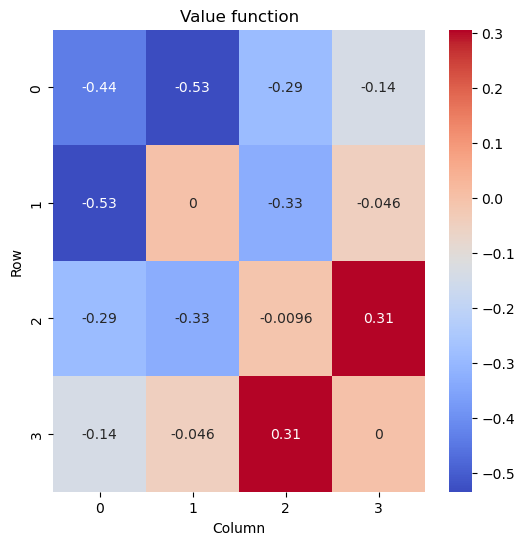

In [6]:
grid_size = (4,4)
goal_state = (3,3)
pit_state = (1,1)

env = GridMDP(grid_size, goal_state, pit_state)

V = policy_evaluation(env)
visualize_value_function(V)

- Random Policy: This result is reasonable for a random policy, where each action is taken with equal probability `(0.25)`. The random policy doesn’t favor states that lead directly to the goal, so we don’t see very high values anywhere except for the states directly adjacent to the goal.
- Terminal States: Both the goal and the pit states have values of `0` because they are terminal states. Once the agent reaches these states, no further reward is accumulated.


**Improvements:**

1. Modify Rewards: 
    - Ensure that the environment provides positive or negative rewards when the agent moves toward a goal or away from the pit.
    - For instance, we can add a small negative reward (e.g., `-0.1`) for each step the agent takes to encourage it to reach the goal quickly.
2. Modify Policy:
    - Implement a greedy policy that favors actions leading to states with higher expected rewards.

Lets update GridMDP Class with Step Penalty. We will introduce a small negative reward for every action the agent takes, encouraging it to reach the goal quickly.

Step panalty:
1. A step penalty of `-0.1` will be applied to every move. This encourages the agent to reach the goal as quickly as possible and prevents it from wandering aimlessly (which is the cause of zero values under the random policy). This is commonly referred to as a time penalty or living penalty, and it's used to avoid indefinite exploration and force the agent to make meaningful decisions.

2. Reward construction: 
   - $\text Goal state: + 1$
   - $\text Pit state: -1$
   - $\text Non-terminal states: -0.1$ (penalty for taking steps)

In [7]:
class UpdatedGridMDP:
    def __init__(self, grid_size: Tuple[int, int], goal_state: Tuple[int, int], pit_state: Tuple[int, int], gamma: float = 0.9):
        """
        Initializes the Gridworld MDP environment.

        Args:
        - grid_size (Tuple[int, int]): Size of the grid (rows, columns).
        - goal_state (Tuple[int, int]): The state where the agent receives a positive reward.
        - pit_state (Tuple[int, int]): The state where the agent receives a negative reward.
        - gamma (float): The discount factor, controlling how future rewards are weighted.
        """
        self.grid_size: Tuple[int, int] = grid_size
        self.goal_state: Tuple[int, int] = goal_state
        self.pit_state: Tuple[int, int] = pit_state
        self.actions: list[str] = ['up', 'down', 'left', 'right']  # Define the possible actions
        self.gamma: float = gamma
        
        # Define the rewards. Each step costs -0.1, except for the goal (+1) and pit (-1).
        # Penalty for each move to encourage reaching the goal faster
        self.rewards: np.ndarray = np.full(grid_size, -0.1)  
        # Reward for reaching the goal
        self.rewards[goal_state] = 1  
        # Penalty for falling into a pit
        self.rewards[pit_state] = -1  

        # Initialize a random policy with equal probability for all actions (uniform policy)
        self.policy: np.ndarray = np.ones((grid_size[0], grid_size[1], len(self.actions))) / len(self.actions)
        
    def get_next_state(self, state: Tuple[int, int], action: str)-> Tuple[int, int]:
        row, col = state
        
        if action == "up": return (max(0, row-1), col)
        elif action == "down": return (min(self.grid_size[0] -1, row+1), col)
        elif action == "right": return (row, min(self.grid_size[1]-1, col +1))
        elif action == "left": return (row, max(0, col - 1))
        
    def get_reward(self, state:Tuple[int, int])->float:
        return self.rewards[state]
    
    def is_terminal(self, state: Tuple[int, int])->bool:
        return state == self.goal_state or state == pit_state


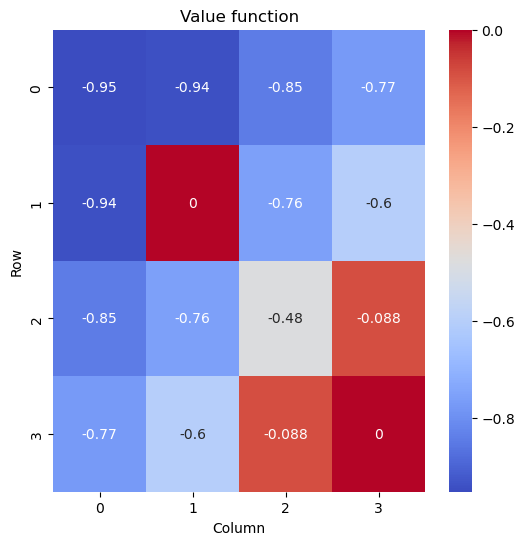

In [8]:
grid_size = (4,4)
goal_state = (3,3)
pit_state = (1,1)

env = UpdatedGridMDP(grid_size, goal_state, pit_state)

V = policy_evaluation(env)
visualize_value_function(V)

Lets improve it more.

- Policy Update: Right now, we are using a random policy, which means the agent explores each action with equal probability. A possible next step would be to switch to a greedy policy to make the agent prefer actions that lead to higher-value states, allowing for faster movement towards the goal.

Lets use Greedy policy. A greedy policy means the agent always chooses the action that maximizes the expected return (value) from the next state.

How does it work?
- During policy evaluation, we calculate the value of each state.
- In a greedy policy, for each state, we select the action that leads to the next state with the highest value.
- The greedy policy is defined as 
    $$
    \pi(s) = \arg\max_{a} \left( R(s, a, s') + \gamma V(s') \right)
    $$
    This equation selects the action 
    $\text(a)$ a that maximizes the sum of the immediate reward and the discounted value of the next state.

Implementation:
1. Policy Improvement: For each state, update the policy by choosing the action that leads to the highest value of the next state (greedy choice).
2. Re-Evaluate: After updating the policy, we can re-run the value function evaluation to see how the state values change under the new policy.

In [9]:
def greedy_policy(env:UpdatedGridMDP, V:np.ndarray) -> np.ndarray:
    """
    Update the policy greedily based on the value function V.
    
    Args:
    - env (GridMDP): The Gridworld MDP environment.
    - V (np.ndarray): The current value function.
    
    Returns:
    - np.ndarray: The updated greedy policy.
    """
    new_policy = np.zeros_like(env.policy)
    for row in range(env.grid_size[0]):
        for col in range(env.grid_size[1]):
            state = (row, col)
            if env.is_terminal(state): continue
            action_values = []
            # iterate over all actions, compute action value for each actions 
            for action_idx, action in enumerate(env.actions):
                next_state = env.get_next_state(state, action)
                reward = env.get_reward(next_state)
                action_value = reward + env.gamma * V[next_state]
                action_values.append(action_value)
            
            # get the best action (the action that gives the best value)
            best_action_idx = np.argmax(action_values)
            
            # Update the policy to be greedy: 1 for the best action, 0 for others
            # Set all actions' probabilities to 0
            new_policy[row, col, :] = 0
            # Set the best action's probability to 1
            new_policy[row, col, best_action_idx] = 1
    
    return new_policy
    

Random Policy: 
[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]
GIF saved as amimated/random_policy_eval.gif and images have been deleted.


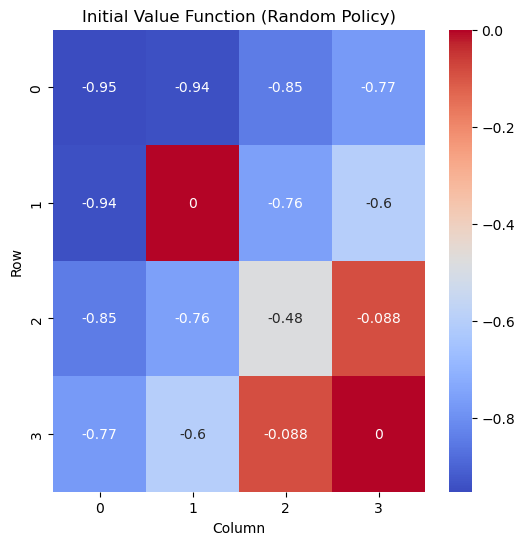

Greedy Policy: 
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]]]

GIF saved as amimated/greedy_policy_eval.gif and images have been deleted.


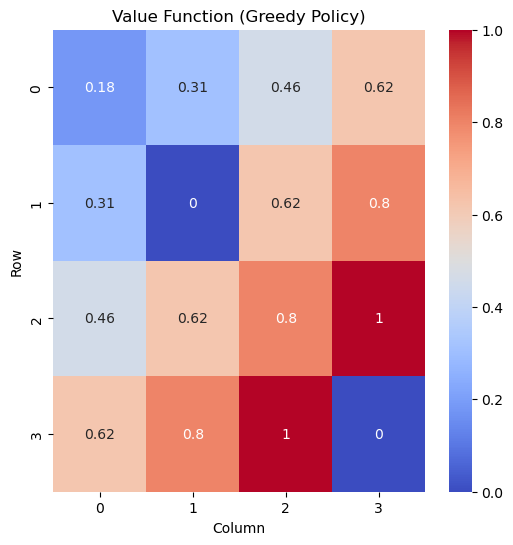

In [10]:
# Example of Gridworld MDP
grid_size: Tuple[int, int] = (4, 4)  # 4x4 grid
goal_state: Tuple[int, int] = (3, 3)
pit_state: Tuple[int, int] = (1, 1)

# Create GridMDP environment
env = UpdatedGridMDP(grid_size, goal_state, pit_state)

print(f"Random Policy: \n{env.policy}")

# Perform initial policy evaluation (random policy)
V = policy_evaluation(env, save_gif="random_policy_eval")

# Visualize the initial value function
visualize_value_function(V, title="Initial Value Function (Random Policy)")

# Update the policy greedily based on the current value function
env.policy = greedy_policy(env, V)

print(f"Greedy Policy: \n{env.policy}\n")

# Re-run policy evaluation with the new greedy policy
V_greedy = policy_evaluation(env, save_gif="greedy_policy_eval")

# Visualize the updated value function (greedy policy)
visualize_value_function(V_greedy, title="Value Function (Greedy Policy)")


### **Random Policy Value Function** (First Image)

1. **Overall Negative Values**:
   - In the random policy, most of the states have negative values. This is because the agent is wandering around without a clear strategy to reach the goal, often taking unnecessary steps and accruing the step penalty (e.g., `-0.1` for each step).
   - For instance, states in the upper-left corner like `(0,0)` and `(0,1)` have values of `-0.95` and `-0.94`, respectively, reflecting the fact that the agent takes many steps and doesn't prioritize reaching the goal.

2. **Goal and Pit States**:
   - The goal state `(3,3)` has a value of `0` because it’s a terminal state, and no further rewards are accumulated after reaching it.
   - Similarly, the pit state `(1,1)` also has a value of `0`, which is terminal, so there is no further penalty after falling into the pit.

3. **Values Near the Goal**:
   - The states near the goal have smaller negative values, for example, `(2,3)` has `-0.088` and `(3,2)` has `-0.088`. These values are less negative compared to other states because they are close to the goal and accumulate fewer step penalties.
   
4. **Values Near the Pit**:
   - States like `(1,0)` and `(1,1)` have more negative values, reflecting the risk of falling into the pit. The state `(1,0)` has a value of `-0.94`, indicating that the agent may often fall into the pit when following a random policy.

#### **Greedy Policy Value Function** (Second Image)

1. **Significantly Higher Values**:
   - In the greedy policy, most states have **positive values**. This reflects that the agent is now prioritizing actions that lead toward the goal.
   - For example, states like `(3,2)` and `(2,3)` now have values of `1`, indicating that the agent can easily transition from these states to the goal and accumulate the reward.

2. **Goal and Pit States**:
   - The goal state `(3,3)` still has a value of `0`, as it’s terminal. The pit state `(1,1)` also retains the value of `0` as it’s terminal as well.

3. **Improved Values for Non-Terminal States**:
   - For example, states like `(2,2)` now have a value of `0.8` (compared to `-0.0096` in the random policy). The greedy policy significantly boosts these values because the agent is now making better decisions to reach the goal more efficiently.
   - States like `(3,0)` and `(3,1)` also have positive values (`0.62` and `0.8`), as they lead the agent to the goal state more effectively.

4. **Path to the Goal**:
   - The greedy policy creates a clear path toward the goal, as seen in the values of states `(2,2)`, `(2,3)`, `(3,2)`, and `(3,3)`. This progression shows how the agent moves optimally toward the goal, accumulating higher values along the way.

#### **Key Differences and Improvements**

1. **From Negative to Positive Values**:
   - In the random policy, the agent receives negative rewards because it is exploring without a clear strategy, leading to wasted steps. In the greedy policy, the values shift to positive because the agent is choosing actions that lead directly to the goal, minimizing the step penalty.
   
2. **Efficiency**:
   - The greedy policy results in higher values because the agent is more efficient in reaching the goal, compared to the random wandering under the random policy. As the greedy policy favors high-reward actions, it significantly improves the value of states near the goal.

3. **Strategic Movement**:
   - The greedy policy shows that the agent strategically avoids the pit and moves toward the goal as quickly as possible, resulting in higher values in states that are on the path to the goal. The random policy, in contrast, shows the agent moving aimlessly, accruing penalties and lowering the value function.

#### **Conclusion**

- The **random policy** results in low and negative values, reflecting an inefficient strategy with no clear goal direction.
- The **greedy policy** leads to significantly higher values, as the agent efficiently reaches the goal while avoiding penalties.


In [11]:
from utils import display_images_in_grid
from config import Config
images = [
    f"{Config.gif_dir}/greedy_policy_eval.gif",
    f"{Config.gif_dir}/random_policy_eval.gif"
]
display_images_in_grid(images)